## Experiment 2 - influence of percentage visited per user on nDCG

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
Path = "../result_gowalla/result_full Dataset/"
ds = "gowalla"
alg = "STACP"
df_100 = pd.read_csv(Path+"result_top_20_100.txt", sep = "\t", header = None)
df_100.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
# df_80 = pd.read_csv(Path+"result_top_20_80.txt", sep = "\t", header = None)
# df_80.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_60 = pd.read_csv(Path+"result_top_20_60.txt", sep = "\t", header = None)
df_60.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
# df_40 = pd.read_csv(Path+"result_top_20_40.txt", sep = "\t", header = None)
# df_40.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]

In [9]:
ex2 = pd.DataFrame(columns = ["dataset","algorithm", "visited","nDCG"]) 
#ex2 = ex2.append({'dataset':ds,'algorithm': alg, 'visited':40, 'nDCG':df_40["ndcg"].mean()}, ignore_index=True)
ex2 = ex2.append({'dataset':ds,"algorithm": alg, 'visited':60, 'nDCG':df_60["ndcg"].mean()}, ignore_index=True)
#ex2 = ex2.append({'dataset':ds,"algorithm": alg, 'visited':80, 'nDCG':df_80["ndcg"].mean()}, ignore_index=True)
ex2 = ex2.append({'dataset':ds,"algorithm": alg, 'visited':100, 'nDCG':df_100["ndcg"].mean()}, ignore_index=True)

In [10]:
ex2

dataset algorithm visited      nDCG
0  gowalla     STACP      60  0.031180
1  gowalla     STACP     100  0.036401

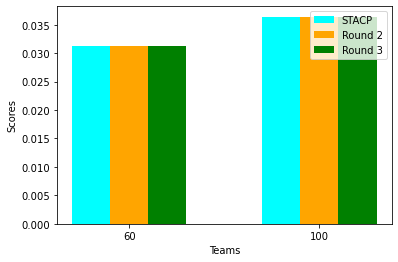

In [13]:
# create data 
x = np.arange(2) 
y1 = ex2.nDCG
y2 = ex2.nDCG
y3 = ex2.nDCG
width = 0.2
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, y1, width, color='cyan') 
plt.bar(x, y2, width, color='orange') 
plt.bar(x+0.2, y3, width, color='green') 
plt.xticks(x, [ '60', '100']) 
plt.legend(["STACP", "Round 2", "Round 3"]) 
plt.xlabel("Teams") 
plt.ylabel("Scores") 
plt.show() 

In [14]:
df_100.mean()

cnt     2813.500000
uid     2813.500000
prec       0.032578
rec        0.066694
ndcg       0.036401
map        0.021671
dtype: float64

In [157]:
df["ndcg"].mean()

0.040920421588774174

In [251]:
train_file = "Gowalla_train.txt"
train_data = pd.read_csv(train_file, sep = "\t", header = None)
train_data.columns = ["uid", "lid", "freq"]
perc = 0.8
new_train = pd.DataFrame()        


In [252]:

for i in train_data.uid.unique():
    new_train = new_train.append(train_data.loc[train_data["uid"]==i].iloc[:int(np.round(len(train_data.loc[train_data["uid"]==i])*perc))])

In [249]:
new_train

uid    lid  freq
0          0      1    28
1          0      2     2
2          0      6    14
3          0      7     2
4          0     32     7
...      ...    ...   ...
262703  5627   5068     1
262704  5627   2706     1
262705  5627  11022     1
262706  5627  14557     1
262707  5627   5080     1

[157760 rows x 3 columns]

In [253]:
new_train.to_csv("train_80.txt", sep = "\t", header = False, index = False)